In [2]:
import pandas as pd  # requires: pip install pandas
import torch
from chronos import ChronosPipeline

/Users/dollerenshaw/opt/anaconda3/envs/chronos/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [16]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
forecast = pipeline.predict(
    context=torch.tensor(df["#Passengers"]),
    prediction_length=64,
    num_samples=20,
)
forecast

tensor([[[450.0396, 413.0500, 454.1495,  ..., 587.7229, 608.2726, 637.0422],
         [439.7648, 410.9949, 472.6444,  ..., 480.8643, 538.4035, 521.9637],
         [447.9847, 400.7202, 439.7648,  ..., 458.2594, 491.1390, 515.7987],
         ...,
         [435.6548, 425.3799, 443.8748,  ..., 513.7438, 550.7333, 548.6782],
         [437.7097, 404.8301, 452.0946,  ..., 606.2178, 669.9218, 634.9874],
         [435.6548, 425.3799, 452.0946,  ..., 484.9742, 532.2385, 530.1837]]])

In [17]:
forecast.shape

torch.Size([1, 20, 64])

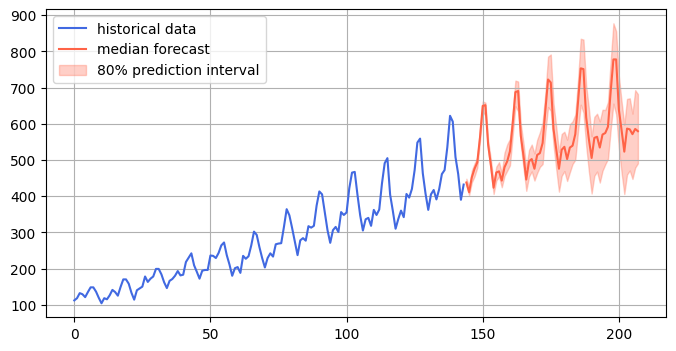

In [18]:
import matplotlib.pyplot as plt  # requires: pip install matplotlib
import numpy as np

forecast_index = range(len(df), len(df) + 64)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()